#  Charegement et preparation  de la données 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import (
    accuracy_score,
    balanced_accuracy_score,
    roc_auc_score,
)
from sklearn import preprocessing
import imblearn
from imblearn.over_sampling import SMOTE
import sklearn.preprocessing as preprocessing

df = pd.read_csv("Data_for_prediction.csv",low_memory=False)
X = df
def encode(X,X_test,categorical_columns):
    le = preprocessing.LabelEncoder()
    XX = X
    for i in categorical_columns : 
        le = preprocessing.LabelEncoder()
        le.fit(XX[i].astype(str))
        print(list(le.classes_))
        X[i] = le.transform(X[i].astype(str))

encode(X,X,["genre"])


def resample_ (n) : 
    XX = pd.DataFrame()
    for i in range(0,15) : 
        X_curr = X[X["genre"] == i][0:n]
        XX = pd.concat([XX , X_curr] , ignore_index=True)
    
    y = XX['genre']
    XX = XX.drop(["genre"] , axis= 1 )
    XX.head()
    XX = XX.drop(["key"] , axis= 1 )
    XX = XX.drop(["mode"] , axis= 1 )
    smo = SMOTE()
    X_sm, y_sm = smo.fit_resample(XX, y)
    X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.3, random_state=42)
    
    return X_sm , y_sm
    



['Dark Trap', 'Emo', 'Hiphop', 'Pop', 'Rap', 'RnB', 'Trap Metal', 'Underground Rap', 'dnb', 'hardstyle', 'psytrance', 'techhouse', 'techno', 'trance', 'trap']


**Equilibrage des Données**





***Seapration des data en ensemble de Test et de Train***

***Entrainement du model et son score avec grid Search***

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

for i in range (6000 ,6001,1) : 
    models_ = []
    print(i)
    DX,DY= resample_(i)
    temp ={}
    temp ["n_rasample"] = i 
    standardScalar = StandardScaler()
    RF = RandomForestClassifier()
    pipe = Pipeline(steps=[('standardScalar', standardScalar), ('RF',RF )])
    param_grid = { "RF__criterion": ("gini", "entropy") , 
                   "RF__max_depth": np.arange(5,30,5) ,"RF__min_samples_split" : [0.5,2,3],
                 "RF__max_features" : ["auto", "sqrt", "log2"] , "RF__bootstrap" : [False , True ]} 
    grid= GridSearchCV(pipe, param_grid, cv=3,return_train_score = True)
    grid.fit(DX, DY)
    temp["BestModel"] = grid.best_estimator_
    temp["BestScore"] = grid.best_score_
    temp["Grid"] = grid 
    models_.append(temp)

6000


In [45]:
models_[0]

{'n_rasample': 6000,
 'BestModel': Pipeline(steps=[('standardScalar', StandardScaler()),
                 ('RF',
                  RandomForestClassifier(bootstrap=False, criterion='entropy',
                                         max_depth=25))]),
 'BestScore': 0.8359716312056737,
 'Grid': GridSearchCV(cv=3,
              estimator=Pipeline(steps=[('standardScalar', StandardScaler()),
                                        ('RF', RandomForestClassifier())]),
              param_grid={'RF__bootstrap': [False, True],
                          'RF__criterion': ('gini', 'entropy'),
                          'RF__max_depth': array([ 5, 10, 15, 20, 25]),
                          'RF__max_features': ['auto', 'sqrt', 'log2'],
                          'RF__min_samples_split': [0.5, 2, 3]},
              return_train_score=True)}

***N=6000***

In [47]:
grid = res_6000['Grid']

In [48]:
df = pd.DataFrame(grid.cv_results_)
#df["alpha"] = df.params.apply(lambda x: x["alpha"])
df.head(1000)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__bootstrap,param_RF__criterion,param_RF__max_depth,param_RF__max_features,param_RF__min_samples_split,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,9.299694,1.130825,0.324614,0.059968,False,gini,5,auto,0.5,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.587506,0.533106,0.560079,0.022211,133,0.602179,0.590196,0.542928,0.578434,0.025579
1,15.106939,1.759230,0.342658,0.013798,False,gini,5,auto,2,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.667983,0.680306,0.665010,0.013864,116,0.697413,0.663455,0.673498,0.678122,0.014243
2,14.556743,1.120904,0.338044,0.032467,False,gini,5,auto,3,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.682145,0.664681,0.665260,0.013557,115,0.704187,0.668221,0.664272,0.678894,0.017958
3,12.979017,3.948179,0.655083,0.261815,False,gini,5,sqrt,0.5,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.569294,0.548085,0.557923,0.008726,134,0.586689,0.571166,0.554894,0.570916,0.012982
4,30.800524,2.991478,0.762382,0.032209,False,gini,5,sqrt,2,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.669413,0.665191,0.659983,0.010493,120,0.697906,0.664749,0.663932,0.675529,0.015827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,72.240240,5.323485,0.529820,0.007080,True,entropy,25,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.849362,0.854502,0.828494,0.033213,19,0.998196,0.970996,0.966843,0.978678,0.013905
176,72.150881,5.457379,0.512144,0.008597,True,entropy,25,sqrt,3,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.848443,0.854366,0.827268,0.034219,21,0.998179,0.970945,0.966843,0.978655,0.013906
177,6.620442,0.997406,0.212176,0.000699,True,entropy,25,log2,0.5,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.418247,0.372119,0.377838,0.030924,170,0.345174,0.418860,0.364119,0.376051,0.031243
178,58.993564,4.655360,0.541708,0.013057,True,entropy,25,log2,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.849430,0.852289,0.827143,0.033560,23,0.998196,0.970996,0.966843,0.978678,0.013905


In [55]:
df = df.sort_values(by = "rank_test_score" )
df.head(10)


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__bootstrap,param_RF__criterion,param_RF__max_depth,param_RF__max_features,param_RF__min_samples_split,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
82,203.433332,69.564173,1.123652,0.384162,False,entropy,25,auto,2,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.858655,0.862502,0.835972,0.034835,1,0.998196,0.970996,0.966843,0.978678,0.013905
86,114.644940,10.021675,0.558643,0.009393,False,entropy,25,sqrt,3,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.856783,0.862502,0.835631,0.034037,2,0.998196,0.970996,0.966843,0.978678,0.013905
88,94.188374,8.319059,0.578381,0.006279,False,entropy,25,log2,2,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.856817,0.862434,0.835279,0.034507,3,0.998196,0.970996,0.966843,0.978678,0.013905
85,114.917258,10.243011,0.565495,0.006559,False,entropy,25,sqrt,2,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.857566,0.861719,0.835189,0.034625,4,0.998196,0.970996,0.966843,0.978678,0.013905
83,115.408486,10.059157,0.563313,0.010690,False,entropy,25,auto,3,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.857396,0.861345,0.834644,0.035005,5,0.998196,0.970996,0.966843,0.978678,0.013905
89,93.721160,8.365087,0.566685,0.010321,False,entropy,25,log2,3,"{'RF__bootstrap': False, 'RF__criterion': 'ent...",...,0.856511,0.861277,0.834553,0.034478,6,0.998196,0.970996,0.966843,0.978678,0.013905
37,85.780933,5.777565,1.598539,0.057695,False,gini,25,auto,2,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.856817,0.859166,0.834201,0.033658,7,0.997889,0.970298,0.966281,0.978156,0.014050
43,70.336630,5.048623,1.555614,0.179722,False,gini,25,log2,2,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.855319,0.859983,0.834054,0.033426,8,0.998043,0.970536,0.966366,0.978315,0.014053
40,87.825002,5.718401,1.582040,0.047783,False,gini,25,sqrt,2,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.855626,0.858826,0.833895,0.033020,9,0.997872,0.970196,0.966349,0.978139,0.014042
38,86.107680,5.128365,1.647633,0.077513,False,gini,25,auto,3,"{'RF__bootstrap': False, 'RF__criterion': 'gin...",...,0.856000,0.858281,0.833838,0.032967,10,0.997702,0.970264,0.966145,0.978037,0.014007


In [126]:
df_gini = df[(df["param_RF__criterion"]== "gini") & (df["param_RF__bootstrap"]== True)]

In [127]:
df_entropy = df[(df["param_RF__criterion"]== "entropy") & (df["param_RF__bootstrap"]== True)]

In [128]:
df_entropy_sqrt = df_entropy[(df_entropy["param_RF__max_features"] == "sqrt") & (df_entropy["param_RF__min_samples_split"]==2)]
df_entropy_auto = df_entropy[(df_entropy["param_RF__max_features"] == "auto" )& (df_entropy["param_RF__min_samples_split"]==2)]
df_entropy_log2 = df_entropy[(df_entropy["param_RF__max_features"] == "log2")& (df_entropy["param_RF__min_samples_split"]==2)]

In [129]:
df_entropy_sqrt

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_RF__bootstrap,param_RF__criterion,param_RF__max_depth,param_RF__max_features,param_RF__min_samples_split,params,...,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
175,72.240240,5.323485,0.529820,0.007080,True,entropy,25,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.849362,0.854502,0.828494,0.033213,19,0.998196,0.970996,0.966843,0.978678,0.013905
166,71.607453,5.395742,0.517135,0.005554,True,entropy,20,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.847081,0.850043,0.824511,0.034035,34,0.997821,0.970349,0.966009,0.978060,0.014086
157,67.610410,5.963892,0.444427,0.000438,True,entropy,15,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.826519,0.825600,0.803904,0.031336,55,0.967098,0.938315,0.930877,0.945430,0.015620
148,55.291963,6.032895,0.337482,0.004435,True,entropy,10,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.767251,0.764528,0.747211,0.026438,77,0.807047,0.777515,0.773226,0.785929,0.015035
139,33.681748,4.761458,0.249257,0.001207,True,entropy,5,sqrt,2,"{'RF__bootstrap': True, 'RF__criterion': 'entr...",...,0.701753,0.701277,0.686548,0.021168,100,0.711353,0.688391,0.690519,0.696755,0.010359


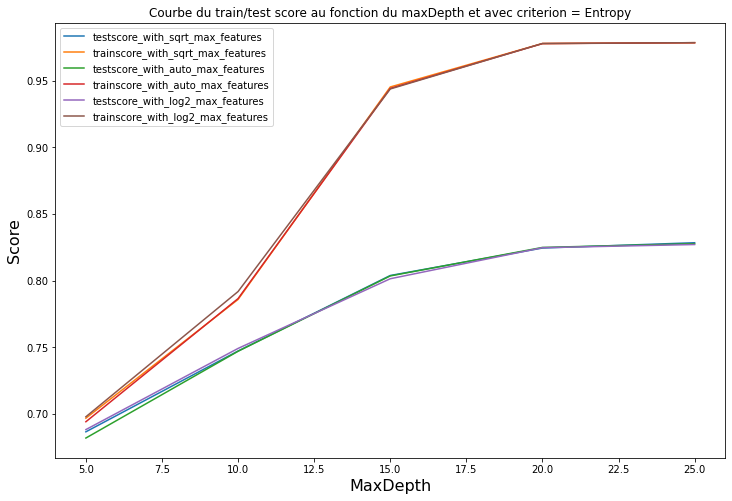

In [130]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
plt.plot (df_entropy_sqrt["param_RF__max_depth"] , df_entropy_sqrt["mean_test_score"] , label = "testscore_with_sqrt_max_features")
plt.plot (df_entropy_sqrt["param_RF__max_depth"] , df_entropy_sqrt["mean_train_score"],label = "trainscore_with_sqrt_max_features")
plt.plot (df_entropy_auto["param_RF__max_depth"] , df_entropy_auto["mean_test_score"],label = "testscore_with_auto_max_features")
plt.plot (df_entropy_auto["param_RF__max_depth"] , df_entropy_auto["mean_train_score"],label = "trainscore_with_auto_max_features")
plt.plot (df_entropy_log2["param_RF__max_depth"] , df_entropy_log2["mean_test_score"],label = "testscore_with_log2_max_features")
plt.plot (df_entropy_log2["param_RF__max_depth"] , df_entropy_log2["mean_train_score"],label = "trainscore_with_log2_max_features")
plt.title("Courbe du train/test score au fonction du maxDepth et avec criterion = Entropy")
plt.xlabel("MaxDepth", size = 16,)
plt.ylabel("Score", size = 16)
plt.legend()

In [138]:
df_gini_sqrt = df_gini[(df_gini["param_RF__max_features"] == "sqrt") & (df_gini["param_RF__min_samples_split"]==3)]
df_gini_auto = df_gini[(df_gini["param_RF__max_features"] == "auto" )& (df_gini["param_RF__min_samples_split"]==3)]
df_gini_log2 = df_gini[(df_gini["param_RF__max_features"] == "log2")& (df_gini["param_RF__min_samples_split"]==3)]

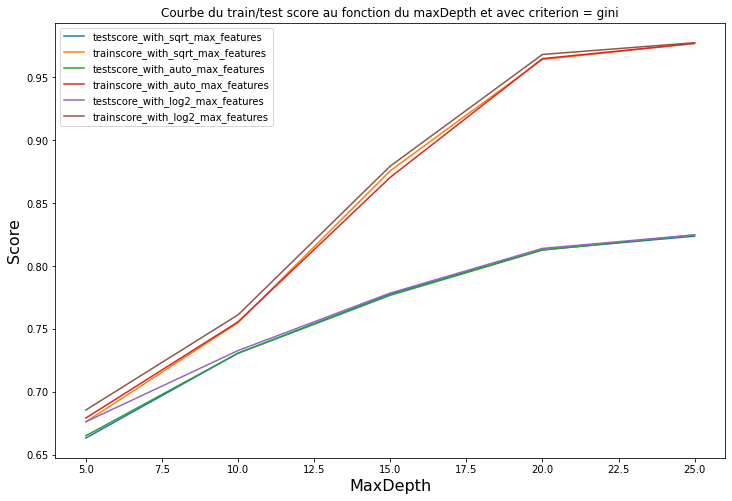

In [137]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12,8))
plt.plot (df_gini_sqrt["param_RF__max_depth"] , df_gini_sqrt["mean_test_score"] , label = "testscore_with_sqrt_max_features")
plt.plot (df_gini_sqrt["param_RF__max_depth"] , df_gini_sqrt["mean_train_score"],label = "trainscore_with_sqrt_max_features")
plt.plot (df_gini_auto["param_RF__max_depth"] , df_gini_auto["mean_test_score"],label = "testscore_with_auto_max_features")
plt.plot (df_gini_auto["param_RF__max_depth"] , df_gini_auto["mean_train_score"],label = "trainscore_with_auto_max_features")
plt.plot (df_gini_log2["param_RF__max_depth"] , df_gini_log2["mean_test_score"],label = "testscore_with_log2_max_features")
plt.plot (df_gini_log2["param_RF__max_depth"] , df_gini_log2["mean_train_score"],label = "trainscore_with_log2_max_features")
plt.title("Courbe du train/test score au fonction du maxDepth et avec criterion = gini")
plt.xlabel("MaxDepth", size = 16,)
plt.ylabel("Score", size = 16)
plt.legend()

***The Best Model*** 

In [141]:
X_sm , y_sm= resample_(6000)
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.33, random_state=42)

In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

#RandomForestClassifier(max_depth=100, n_estimators=300,criterion = 'entropy') The Best criterion = 'entropy'


clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, min_samples_split = 0.00124,  max_depth=50,bootstrap = False,criterion = 'entropy'))
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test) # predictions
score = balanced_accuracy_score(y_test, y_pred) # scoring
print('balanced_accuracy score: {}'.format(score))
score = accuracy_score(y_test, y_pred) # scoring
print('accuracy score: {}'.format(score))

balanced_accuracy score: 0.7828944651392433
accuracy score: 0.7838525548449212


In [147]:
y_pred = clf.predict(X_train) # predictions
score = balanced_accuracy_score(y_train, y_pred) # scoring
print('balanced_accuracy score: {}'.format(score))
score = accuracy_score(y_train, y_pred) # scoring
print('accuracy score: {}'.format(score))

balanced_accuracy score: 0.8478934880435532
accuracy score: 0.8475348474840371


***Matrice de Confusion***

<AxesSubplot:>

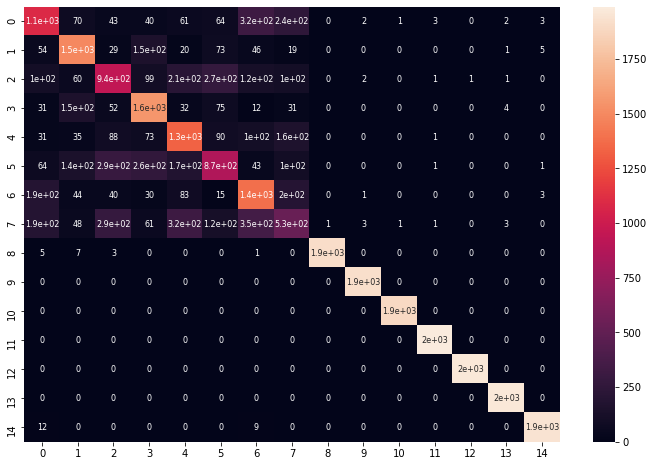

In [146]:
import seaborn as sn
import matplotlib.pyplot as plt 
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
df_cm= pd.DataFrame(cm)
plt.figure(figsize=(12,8))
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8})